In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

## Loading data

In [2]:
#Load the dataframe into a variable
billboard100 = pd.read_csv('Data/billboards_100.csv')
spotify = pd.read_csv('Data/top_songs.csv')

In [3]:
billboard100

,song,artist
0,Flowers,Miley Cyrus
1,Kill Bill,SZA
2,Last Night,Morgan Wallen
3,Unholy,Sam Smith & Kim Petras
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage"
...,...,...
95,Yandel 150,Yandel & Feid
96,Heart To Heart,Mac DeMarco
97,Next Thing You Know,Jordan Davis
98,Never Gonna Not Dance Again,P!nk


In [4]:
spotify

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,artist,name,album,popularity
0,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,0VjIjW4GlUZAMYd2vXMi3b,200040,The Weeknd,Blinding Lights,After Hours,87
1,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.6460,117.999,0yLdNVWF3Srea0uzk55zFn,200455,Miley Cyrus,Flowers,Flowers,100
2,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.4180,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947,SZA,Kill Bill,SOS,91
3,0.715,0.620,-6.005,0.0484,0.41700,0.000000,0.0822,0.1720,97.950,2dHHgzDwk4BJdRwy9uXhTO,221520,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,93
4,0.440,0.317,-9.258,0.0531,0.89100,0.000005,0.1410,0.2680,169.914,6xGruZOHLs39ZbVccQTuPZ,233456,Joji,Glimpse of Us,Glimpse of Us,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,0.692,0.525,-12.691,0.0373,0.02120,0.001900,0.0944,0.0879,103.679,0vZCwj0Mq5uS8GwSIYo6Y7,333200,Rod Stewart,Passion,Foolish Behaviour,39
549,0.712,0.640,-14.215,0.0321,0.01110,0.047800,0.0638,0.9250,130.259,1PuUboooNpZFmtsCJRF4sn,252067,Liquid Gold,Dance Yourself Dizzy,Liquid Gold,39
550,0.716,0.860,-7.807,0.0460,0.00917,0.839000,0.2510,0.9580,142.168,2CfqGS6D9piBWM3SAjbUJM,201013,Spandau Ballet,To Cut A Long Story Short,Gold - The Best of Spandau Ballet,38
551,0.524,0.330,-14.264,0.0297,0.65400,0.000000,0.0635,0.5530,179.598,7mZBgeTb3oLqTRwC1suWXN,255000,Peaches & Herb,I Pledge My Love,At Their Best,35


## Scaling/Normalization

In [5]:
X = pd.DataFrame(spotify, columns= ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

print()
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005
1,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999
2,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.418,88.980
3,0.715,0.620,-6.005,0.0484,0.41700,0.000000,0.0822,0.172,97.950
4,0.440,0.317,-9.258,0.0531,0.89100,0.000005,0.1410,0.268,169.914


In [6]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,0.650939,0.653124,-7.591503,0.073702,0.208731,0.026074,0.166307,0.579219,121.254942
std,0.144004,0.185312,3.445726,0.072760,0.231784,0.110521,0.131492,0.246004,27.252351
min,0.188000,0.034800,-24.709000,0.023200,0.000011,0.000000,0.025100,0.051700,65.043000
25%,0.558000,0.533000,-9.211000,0.033700,0.029300,0.000000,0.085100,0.389000,100.015000
50%,0.671000,0.670000,-6.736000,0.046000,0.117000,0.000010,0.115000,0.583000,119.877000
75%,0.753000,0.798000,-5.211000,0.080200,0.310000,0.000732,0.209000,0.779000,136.086000
max,0.980000,0.982000,-1.190000,0.487000,0.978000,0.985000,0.963000,0.977000,210.654000


In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005
1,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999
2,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.418,88.980
3,0.715,0.620,-6.005,0.0484,0.41700,0.000000,0.0822,0.172,97.950
4,0.440,0.317,-9.258,0.0531,0.89100,0.000005,0.1410,0.268,169.914


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.951795,0.415223,0.481467,-0.191236,-0.895051,-0.235272,-0.583126,-0.997710,1.827186
1,0.389657,0.150565,0.948845,-0.094941,-0.628441,-0.236089,-1.020810,0.271709,-0.119582
2,-0.048226,0.442229,0.535786,-0.475992,-0.676374,1.067969,-0.040398,-0.655944,-1.185372
3,0.445261,-0.178909,0.460843,-0.348058,0.899362,-0.236136,-0.640215,-1.656832,-0.855928
4,-1.466134,-1.815472,-0.484080,-0.283403,2.946220,-0.236093,-0.192636,-1.266241,1.787116


# Clustering the songs with K-Means

In [8]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=7, random_state=1234)

In [9]:
kmeans.labels_

array([5, 2, 2, 4, 3, 4, 5, 2, 4, 5, 2, 1, 3, 3, 2, 1, 3, 3, 5, 0, 4, 2,
       2, 2, 1, 4, 3, 3, 1, 2, 5, 1, 0, 5, 2, 5, 2, 3, 2, 0, 4, 4, 5, 5,
       1, 2, 1, 2, 3, 3, 2, 0, 4, 5, 2, 0, 3, 3, 4, 5, 2, 2, 0, 2, 1, 5,
       3, 5, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 5, 5, 1, 1, 4,
       2, 2, 2, 2, 2, 4, 2, 1, 5, 5, 4, 0, 0, 1, 3, 2, 2, 2, 2, 1, 5, 2,
       4, 3, 5, 4, 3, 4, 3, 0, 2, 3, 3, 0, 1, 4, 4, 2, 5, 3, 3, 2, 0, 1,
       2, 4, 5, 5, 2, 2, 1, 1, 3, 4, 1, 3, 1, 3, 2, 1, 2, 4, 0, 5, 5, 0,
       0, 5, 4, 3, 0, 4, 6, 0, 2, 2, 0, 3, 1, 2, 2, 5, 0, 5, 1, 0, 2, 3,
       1, 3, 0, 3, 4, 2, 3, 5, 6, 2, 2, 5, 1, 2, 3, 1, 0, 2, 2, 5, 1, 5,
       2, 2, 4, 4, 4, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 4,
       1, 5, 2, 5, 2, 2, 0, 2, 2, 2, 4, 2, 2, 1, 2, 2, 4, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 2, 0, 5, 5, 2, 1, 1, 1, 5, 1, 2, 2, 2, 2, 2, 5, 2,
       0, 5, 2, 2, 6, 2, 1, 2, 2, 2, 0, 2, 5, 5, 2, 6, 5, 2, 5, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 0, 0, 2, 5, 2, 2, 2, 5, 2,

In [10]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     40
1     80
2    173
3     64
4     99
5     84
6     13
dtype: int64

In [11]:
spotify ["cluster"] = clusters
spotify 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,artist,name,album,popularity,cluster
0,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,0VjIjW4GlUZAMYd2vXMi3b,200040,The Weeknd,Blinding Lights,After Hours,87,5
1,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.6460,117.999,0yLdNVWF3Srea0uzk55zFn,200455,Miley Cyrus,Flowers,Flowers,100,2
2,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.4180,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947,SZA,Kill Bill,SOS,91,2
3,0.715,0.620,-6.005,0.0484,0.41700,0.000000,0.0822,0.1720,97.950,2dHHgzDwk4BJdRwy9uXhTO,221520,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,93,4
4,0.440,0.317,-9.258,0.0531,0.89100,0.000005,0.1410,0.2680,169.914,6xGruZOHLs39ZbVccQTuPZ,233456,Joji,Glimpse of Us,Glimpse of Us,84,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,0.692,0.525,-12.691,0.0373,0.02120,0.001900,0.0944,0.0879,103.679,0vZCwj0Mq5uS8GwSIYo6Y7,333200,Rod Stewart,Passion,Foolish Behaviour,39,4
549,0.712,0.640,-14.215,0.0321,0.01110,0.047800,0.0638,0.9250,130.259,1PuUboooNpZFmtsCJRF4sn,252067,Liquid Gold,Dance Yourself Dizzy,Liquid Gold,39,4
550,0.716,0.860,-7.807,0.0460,0.00917,0.839000,0.2510,0.9580,142.168,2CfqGS6D9piBWM3SAjbUJM,201013,Spandau Ballet,To Cut A Long Story Short,Gold - The Best of Spandau Ballet,38,6
551,0.524,0.330,-14.264,0.0297,0.65400,0.000000,0.0635,0.5530,179.598,7mZBgeTb3oLqTRwC1suWXN,255000,Peaches & Herb,I Pledge My Love,At Their Best,35,3


In [12]:
kmeans.inertia_

2405.580747720438

In [13]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

3662.4907307850435


## Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

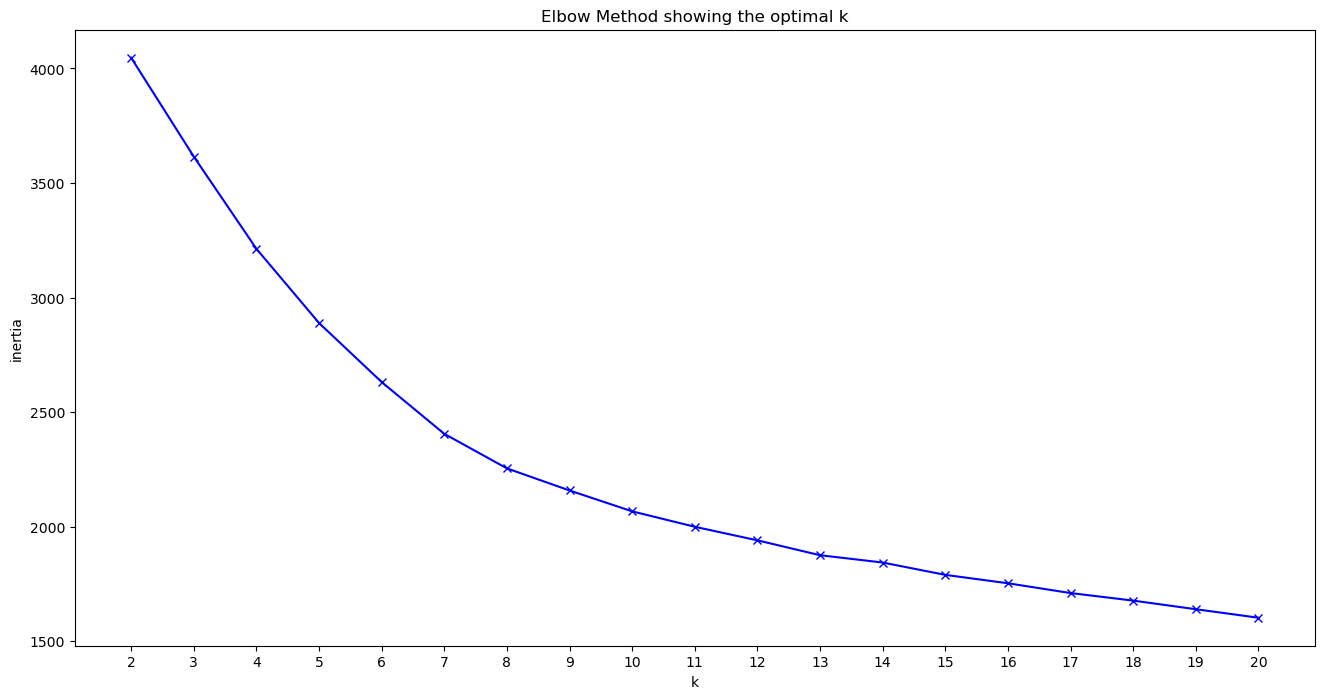

In [14]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [16]:
spotify.to_csv('Data/playlists_clustered.csv', index = False)